#Insurance Claims Charges Prediction

Download dataset

In [2]:
!wget https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv

--2023-12-30 06:34:58--  https://raw.githubusercontent.com/alexjolly28/entri_DSML/main/resources/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55628 (54K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  54.32K  --.-KB/s    in 0.001s  

2023-12-30 06:34:58 (93.8 MB/s) - ‘insurance.csv’ saved [55628/55628]



##STEP-1: Importing Libraries & Data Set

In [3]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# # load dataset
df = pd.read_csv("insurance.csv")

In [4]:
#Read the Data
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


##STEP-2:Exploratory Data Analysis (EDA)




In [5]:
# Descriptive stats
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Null check
df.isnull().value_counts()


age    sex    bmi    children  smoker  region  charges
False  False  False  False     False   False   False      1338
dtype: int64

Visulizations

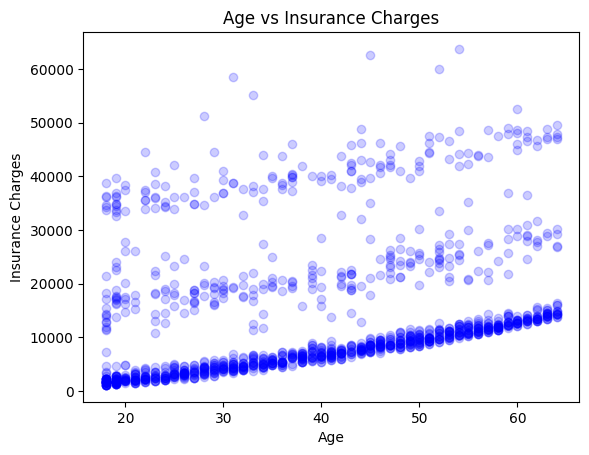

In [7]:
# Age vs Charges
# the more the age the more will be insurance charge
plt.scatter(df.age, df.charges, alpha=0.2, color='blue')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()

Text(0.5, 0, 'Gender')

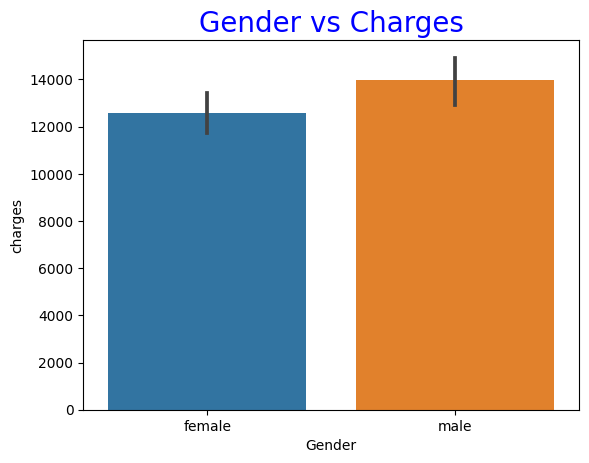

In [8]:
# sex vs charges
# males insurance charges more than females.
sns.barplot(x = 'sex', y = 'charges', data = df)
plt.title("Gender vs Charges", size = 20, color ='blue')
plt.xlabel("Gender")

Text(0.5, 0, 'Smoking Status')

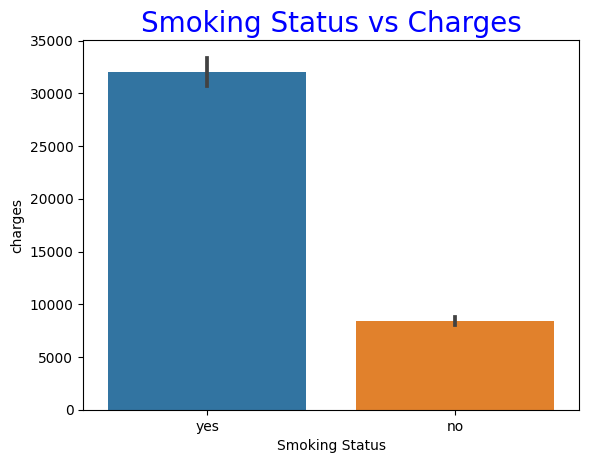

In [9]:
# smoker vs charges
# smokers have more insurance charges than the non smokers
sns.barplot(x = 'smoker', y = 'charges', data = df)
plt.title("Smoking Status vs Charges", size = 20, color ='blue')
plt.xlabel("Smoking Status")

Text(0.5, 0, 'Region')

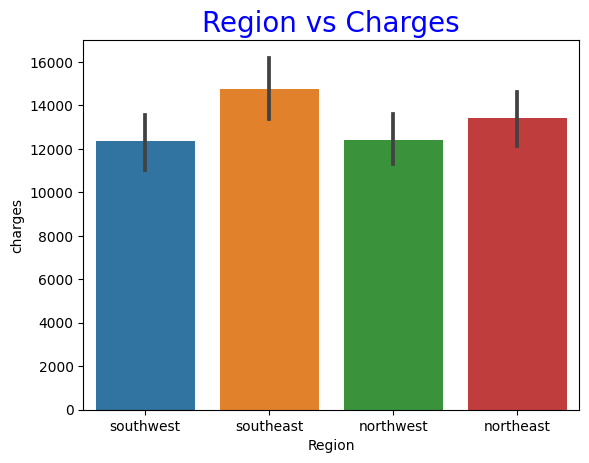

In [10]:
# region vs charges
# region actually does not play any role in determining the insurance charges
sns.barplot(x = 'region', y = 'charges', data = df)
plt.title("Region vs Charges", size = 20, color ='blue')
plt.xlabel("Region")



<ipython-input-11-bc3500f6b218>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
<ipython-input-11-bc3500f6b218>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<Axes: >

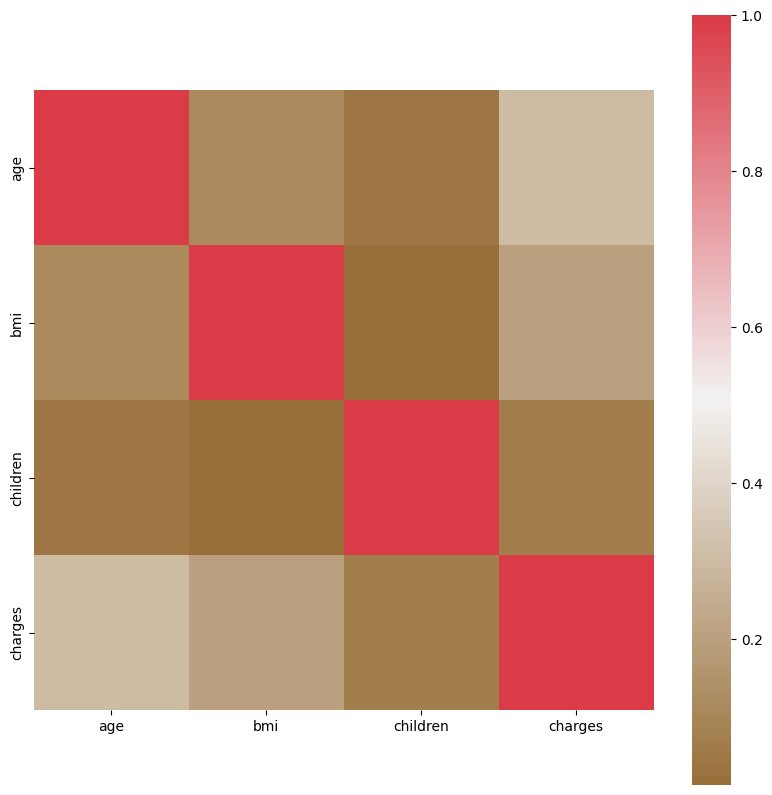

In [11]:
# plotting the correlation plot for the dataset
f, ax = plt.subplots(figsize = (10, 10))

corr = df.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

##STEP-3:Data Preprocessing / Clean the Data


In [12]:
# Label Encoding for sex and smoker
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex_encoded'] = label_encoder.fit_transform(df['sex'])
df['smoker_encoded'] = label_encoder.fit_transform(df['smoker'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])



In [13]:
# removing unnecassary columns from the dataset
unnecessary_columns = ['sex', 'smoker', 'region']
df = df.drop(columns=unnecessary_columns)

In [14]:
#Selecting Independent (Features) & Dependent(Target) variables
X = df[['age', 'sex_encoded', 'bmi', 'children', 'smoker_encoded', 'region_encoded']]
y = df['charges']

Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')
print('-'*49)
print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')
print('-'*49)

X_train has 1070 rows, y_train also has 1070 rows
-------------------------------------------------
X_test has 268 rows, y_test also has 268 rows
-------------------------------------------------


##STEP-4 : Fit the Model & Predict , check the Accuracy

##Linear Regression

In [20]:
from sklearn.preprocessing import StandardScaler as SS
from sklearn.linear_model import LinearRegression

# Feeding independent sets into the standardscaler
X_train = SS().fit_transform(X_train)
X_test = SS().fit_transform(X_test)
lin_reg_mod = LinearRegression()

# Train the model using the X_train  and y_train sets
lin_reg_mod.fit(X_train, y_train)

# Model prediction on test data

lin_reg_y_test_pred = lin_reg_mod.predict(X_test)
# calculating the mean squared error
mse = np.mean((y_test - lin_reg_y_test_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, lin_reg_y_test_pred)
print("r2 score :", r2)

# Print RSquare Score for test data

from sklearn.metrics import r2_score

print("Test data R-squared score for Linear Regression Model is {}".format(r2_score(y_test, lin_reg_y_test_pred)))

MSE : 33638710.48270799
RMSE : 5799.888833650865
r2 score : 0.7833237659369185
Test data R-squared score for Linear Regression Model is 0.7833237659369185


[link text](https://)##Support Vector Machine

In [18]:
from sklearn.svm import SVR

# creating the model
model = SVR()

# feeding the training data to the model
model.fit(X_train, y_train)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - y_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, y_pred)
print("r2 score :", r2)
print("Test data R-squared score for SVC Model is {}".format(r2_score(y_test,y_pred)))

MSE : 165831523.96260473
RMSE : 12877.558928718001
r2 score : -0.06816669205050485
Test data R-squared score for SVC Model is -0.06816669205050485


##Decision Tree

In [25]:
from sklearn.tree import DecisionTreeRegressor
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(X_train, y_train)

# Predict the results
dt_y_test_pred = dt_regressor.predict(X_test)
# Evaluate the Model
dt_regressor.score(X_test, y_test)

# predicting the test set results
y_pred = model.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - dt_y_test_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, dt_y_test_pred)
print("r2 score :", r2)
# Evaluate the model
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))

MSE : 37496105.548185475
RMSE : 6123.406368042666
r2 score : 0.7584772178948698
Test dataset df_regressor score for Decision Tree Regression Model is 0.7584772178948698


##Random Forest

In [32]:
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 40,random_state = 4,n_jobs = -1)

# Fit the Model with training data
rf_regressor.fit(X_train, y_train)
# Model Prediction
rf_y_test_pred = rf_regressor.predict(X_test)

# calculating the mean squared error
mse = np.mean((y_test - rf_y_test_pred)**2, axis = None)
print("MSE :", mse)

# Calculating the root mean squared error
rmse = np.sqrt(mse)
print("RMSE :", rmse)

# Calculating the r2 score
r2 = r2_score(y_test, rf_y_test_pred)
print("r2 score :", r2)
# Evaluate the model
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))


MSE : 21026649.543812957
RMSE : 4585.482476666219
r2 score : 0.8645615372069746
Test dataset R-squared score for Random Forest Regressor Model is 0.8645615372069746


Compare and evaluate the Model results and find the best model

In [34]:
print("Test data R-squared score for Linear Regression Model is {}".format(r2_score(y_test, lin_reg_y_test_pred)))
print("Test data R-squared score for SVC Model is {}".format(r2_score(y_test,y_pred)))
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))


Test data R-squared score for Linear Regression Model is 0.7833237659369185
Test data R-squared score for SVC Model is -0.06816669205050485
Test dataset df_regressor score for Decision Tree Regression Model is 0.7584772178948698
Test dataset R-squared score for Random Forest Regressor Model is 0.8645615372069746


*We see that the best model amongst the three we used is Random Forest Regressor*